In [ ]:
!pip install xgboost catboost lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#loading dataset california housing
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#xgb regression
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb))


XGBoost RMSE: 0.4717943691423984
XGBoost R2 Score: 0.8301370561019205


In [ ]:
#catboost regression
from catboost import CatBoostRegressor
cat = CatBoostRegressor(verbose=0)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
print("CatBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_cat)))
print("CatBoost R2 Score:", r2_score(y_test, y_pred_cat))


CatBoost RMSE: 0.4445313768412239
CatBoost R2 Score: 0.8492011667520589


In [ ]:
#lightgbm regression
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
print("LightGBM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
print("LightGBM R2 Score:", r2_score(y_test, y_pred_lgbm))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
LightGBM RMSE: 0.45987687653485965
LightGBM R2 Score: 0.8386101247143777


In [ ]:
#compare results
results = {
    "Model": ["XGBoost", "CatBoost", "LightGBM"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        np.sqrt(mean_squared_error(y_test, y_pred_cat)),
        np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_cat),
        r2_score(y_test, y_pred_lgbm)
    ]
}
results_df = pd.DataFrame(results)
print(results_df)


      Model      RMSE  R2 Score
0   XGBoost  0.471794  0.830137
1  CatBoost  0.444531  0.849201
2  LightGBM  0.459877  0.838610


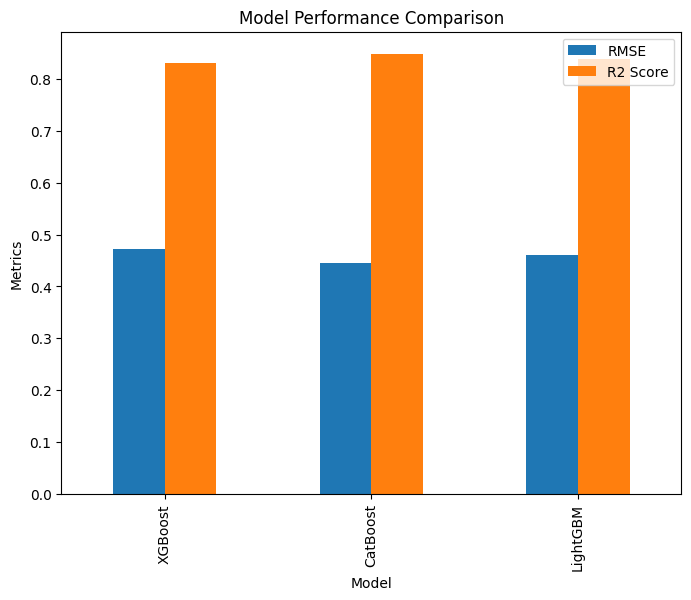

In [ ]:
results_df.plot(kind="bar", x="Model", y=["RMSE", "R2 Score"], figsize=(8, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Metrics")
plt.show()


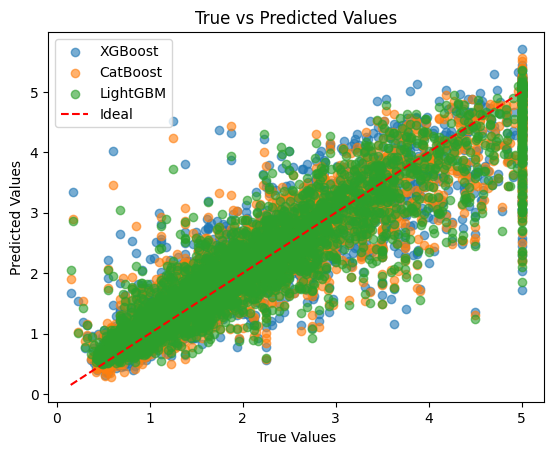

In [ ]:
#true vs predicted
plt.scatter(y_test, y_pred_xgb, alpha=0.6, label="XGBoost")
plt.scatter(y_test, y_pred_cat, alpha=0.6, label="CatBoost")
plt.scatter(y_test, y_pred_lgbm, alpha=0.6, label="LightGBM")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal")
plt.title("True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()
